# Loading packages 

In [44]:
suppressPackageStartupMessages(library(tidyverse))
install.packages("rstatix", quiet = TRUE)
suppressPackageStartupMessages(library(rstatix))

# Reading in the data

In [45]:

df <- readr::read_csv('data/chocolate_bars.csv', show_col_types = FALSE)
head(df)

id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76,3,"B,S,C","rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76,3,"B,S,C","cocoa, vegetal, savory",3.50
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76,3,"B,S,C","cocoa, blackberry, full body",3.75
2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68,3,"B,S,C","chewy, off, rubbery",3.00
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72,3,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80,3,"B,S,C","mildly bitter, basic cocoa, fatty",3.25


# What is the average rating by country of origin?


In [46]:
avg_rating_country <- df %>%
group_by(bean_origin) %>%
summarise(avg_rating = mean(rating))
avg_rating_country

bean_origin,avg_rating
<chr>,<dbl>
Australia,3.250000
Belize,3.233553
Blend,3.038462
Bolivia,3.181250
Brazil,3.262821
Burma,3.000000
Cameroon,3.083333
China,3.500000
Colombia,3.196203


## Visualization: average rating by country of origin 

As indicated in the figure below, the majority of the countries have average ratings between 3 and 3.25, which is equivalent to "Recommended." Tobago has the highest average rating, while Puerto Rico has the lowest.

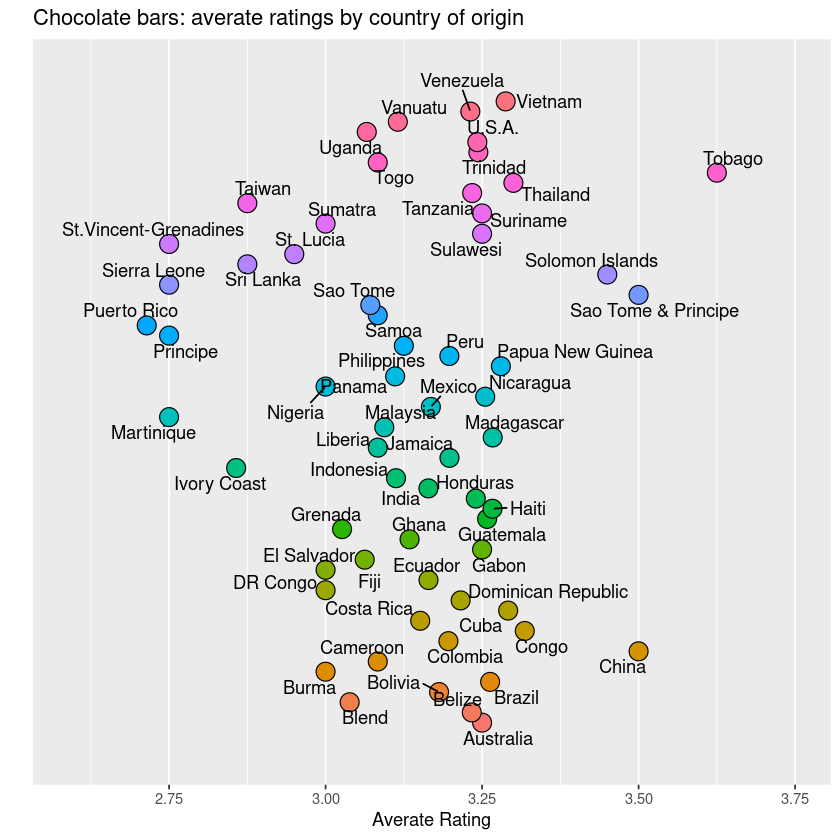

In [47]:
ggplot(avg_rating_country, aes(x = avg_rating, y=bean_origin)) + geom_point(aes(fill = bean_origin), size = 5, shape = 21) + theme(legend.position="none") +  ggrepel::geom_text_repel(aes(label = bean_origin)) + scale_y_discrete(breaks = FALSE, expand = expansion(mult = 0.1)) + scale_x_continuous(expand = expansion(mult = 0.2)) + labs(title = "Chocolate bars: averate ratings by country of origin", x = "Averate Rating", y = "")

# How many bars were reviewed for each of those countries?

The number of bars evaluated varies by country (between 253 to 1 bars), as shown in the table below. 

In [48]:

n_bars_country <- df %>%
group_by(bean_origin) %>%
summarize(n = n())
n_bars_country

bean_origin,n
<chr>,<int>
Australia,3
Belize,76
Blend,156
Bolivia,80
Brazil,78
Burma,1
Cameroon,3
China,1
Colombia,79


## Visualization: Bars reviewed by country of origin

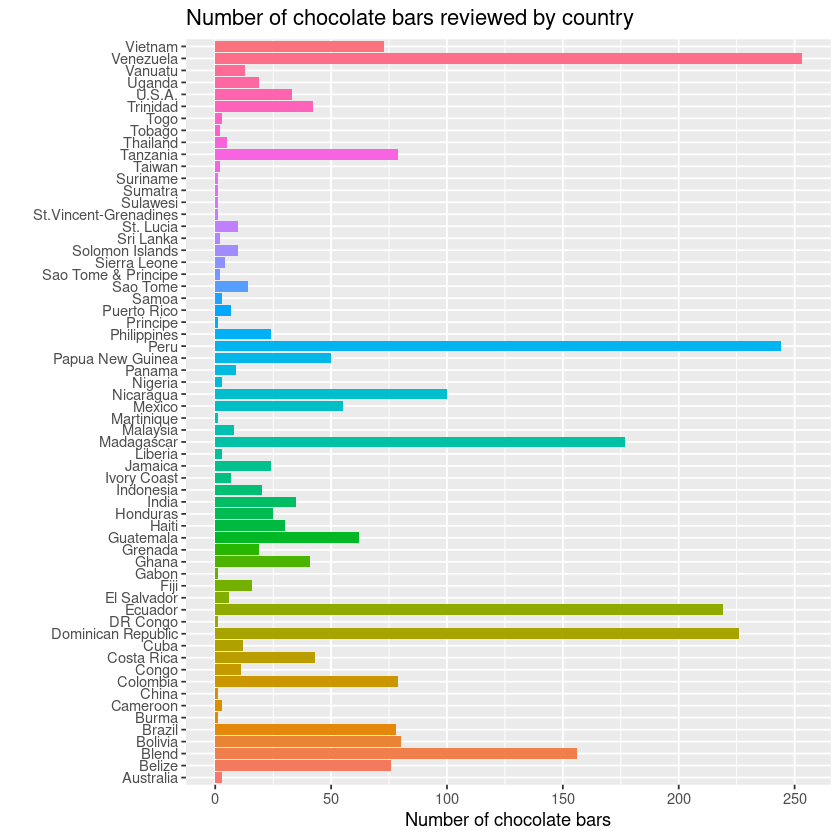

In [49]:
ggplot(n_bars_country, aes(x = bean_origin, y = n)) + geom_col(aes(fill = bean_origin), width = 0.9) + coord_flip() + theme(legend.position="none") + labs(title = "Number of chocolate bars reviewed by country", x = "", y = "Number of chocolate bars")

# Is the cacao bean's origin an indicator of quality?

We want to test the following hypothesis: 


$H_0: \mu_{diff} = 0$: the average rating is the same between countries. \
$H_A: \mu_{diff} > 0$: the average rating is different between countries.




The data do not conform to the assumption of normality, preventing the use of a parametric test to verify the hypothesis that there is a difference in the average rating between the cacao bean's origin. This is seen by the histogram of rating, the distribution of residuals in the Q-Q plot and by the p.value lower than 0.05 obtained in the Shapiro-Wilk normality test. The histogram shows a left-skewed distribution. Notice that the residuals in the Q-Q plot do not exactly form a straight line, but curve off in the extremities. 

It is also worth noting that, while being handled as interval, the dependent variable (rating) has an ordinal nature. The intervals are not well-defined to receive a continuous treatment and be suitable for parametric methods: for example, the distance between 1.1 and 1.3 is not the same as the distance between 2.8 and 3.0, despite the fact that both intervals differ by 0.2. The gap between 2.8 and 3.0 is greater than the gap between 1.1 and 1.3, since 2.8 and 3.0 belong to different categories, "disappointing" and "recommended," whereas 1.1 and 1.3 belong to the same category, "unpleasant."

With these aspects in mind, we opted for the Kruskal-Wallis test. The test detected no significant differences in ratings across countries. Therefore, there is no evidence that the origin of the cacao bean is an indicator of quality.

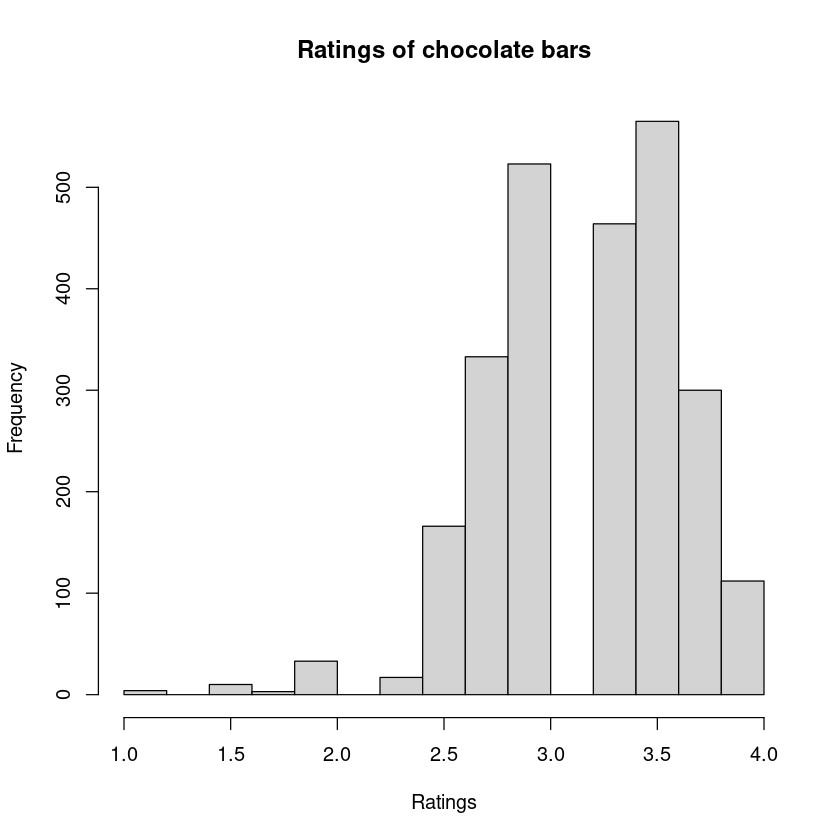

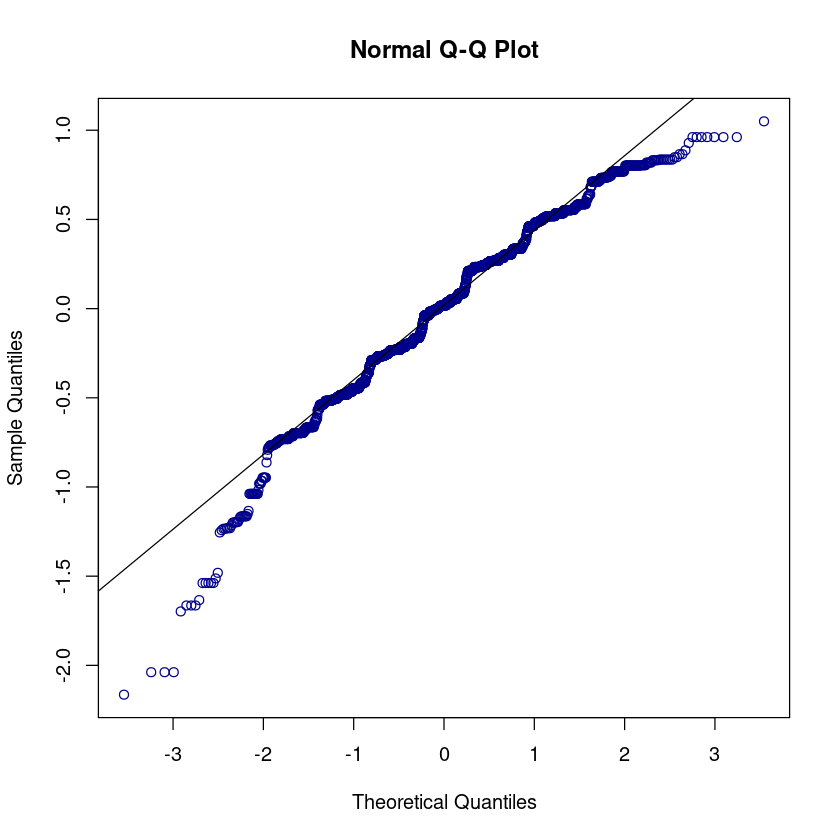

In [50]:
hist(df$rating, main = "Ratings of chocolate bars", xlab = "Ratings")
model <- aov(rating ~  bean_origin, df)
res <- resid(model)
qqnorm(res,  col = "dark blue") 
qqline(res)

# How does cocoa content relate to rating? 

## What is the average cocoa content for bars with higher ratings (above 3.5)

The average cocoa content for bars with ratings above 3.5 is 70.95%. Chocolate bars with ratings below 3.5 have a slighly higher average cocoa content (72%) than bars with ratings above 3.5. 

In [52]:
avg_rating_cocoa_high <- df %>%
filter(rating > 3.5) %>%
summarise(mean(cocoa_percent)) 
avg_rating_cocoa_high

avg_rating_cocoa_low <- df %>%
filter(rating < 3.5) %>%
summarise(mean(cocoa_percent)) 
avg_rating_cocoa_low


mean(cocoa_percent)
<dbl>
70.94782


mean(cocoa_percent)
<dbl>
71.97392


## Is the cocoa content an indicator of quality? 

The graph below and findings in the preceding section indicate that chocolate bars with a high cocoa content tend to receive the lowest ratings. In other words, there appears to be a negative correlation: as cocoa content increases, ratings decline. However, the Spearman's correlation coefficient is low, indicating a very weak negative correlation between cocoa content and ratings ($\rho$ = -0.11, p-value < 0.01). 



`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'




var1,var2,cor,statistic,p,method
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
rating,cocoa_percent,-0.11,2995572438,3.02e-08,Spearman


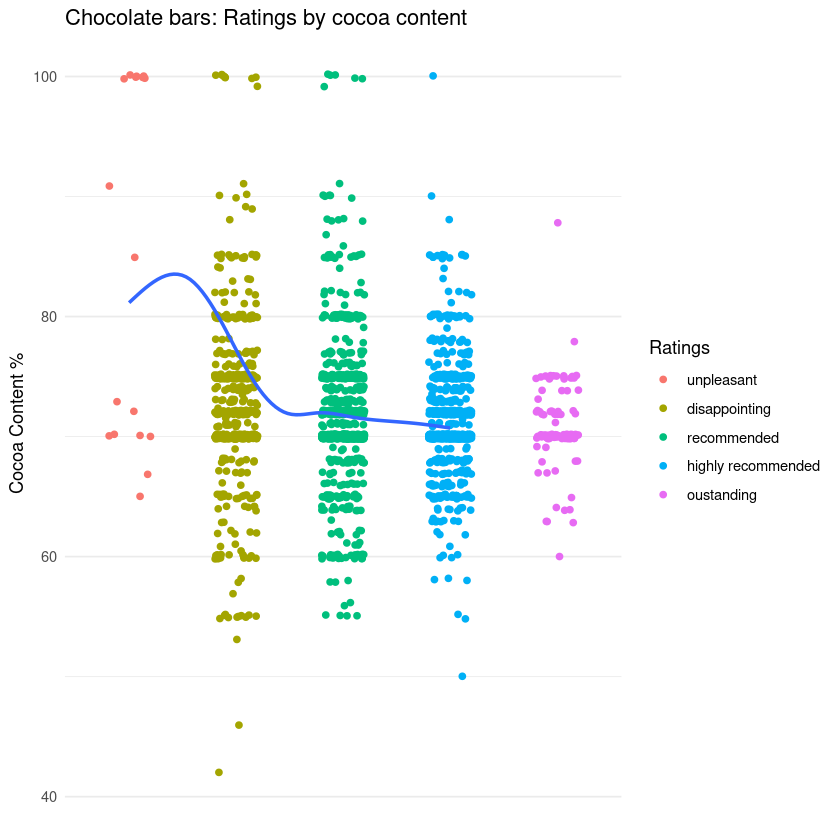

In [53]:
df_ordinal <- df %>%
mutate(ranking = case_when(between(rating, 1, 1.9) ~ 'unpleasant',
          between(rating, 2, 2.9) ~ 'disappointing',
          between(rating, 3, 3.49) ~ 'recommended',
          between(rating, 3.5, 3.9) ~ 'highly recommended',
          between(rating, 4, 5) ~ 'oustanding'
         ))
df_ordinal$ranking <- factor(df_ordinal$ranking, order = TRUE, levels = c("unpleasant", "disappointing", "recommended", "highly recommended", "oustanding"))

ggplot(df_ordinal, aes(ranking, cocoa_percent, color=ranking)) +
geom_jitter(position=position_jitter(0.2))  + theme(axis.line.x = element_line(colour = 'black', size=0.5, linetype='solid'), axis.line.y = element_line(colour = 'black', size=0.5, linetype='solid')) + labs(title = "Chocolate bars: Ratings by cocoa content", x = "", y = "Cocoa Content %") + scale_x_discrete(breaks = FALSE, limits = c("unpleasant", "disappointing", "recommended", "highly recommended","oustanding")) + scale_color_discrete(name = "Ratings") + geom_smooth(aes(x = rating, y = cocoa_percent), se = FALSE, inherit.aes = FALSE) +  theme_minimal() 

df %>%
cor_test(rating, cocoa_percent, method = "spearman")

# Average rating of bars with and without lecithin (L in the ingredients)

The average rating of bars with lecithin is 3.15, whereas the average rating of bars without lecithin is 3.21. That is, the average rating of bars with lecithin is lower than the one of bars without lecithin. 

In [54]:
df$ingredients <- ifelse(grepl("L", df$ingredients), 'L', 'N')
head(df, 20)
avg_rating_lecithin <- df %>%
group_by(ingredients) %>%
summarise(mean(rating))
avg_rating_lecithin

id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76,3,N,"rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76,3,N,"cocoa, vegetal, savory",3.50
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76,3,N,"cocoa, blackberry, full body",3.75
2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68,3,N,"chewy, off, rubbery",3.00
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72,3,N,"fatty, earthy, moss, nutty,chalky",3.00
2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80,3,N,"mildly bitter, basic cocoa, fatty",3.25
2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68,3,N,"milk brownie, macadamia,chewy",3.50
797,A. Morin,France,2012,Bolivia,Bolivia,70,4,L,"vegetal, nutty",3.50
797,A. Morin,France,2012,Peru,Peru,63,4,L,"fruity, melon, roasty",3.75


ingredients,mean(rating)
<chr>,<dbl>
L,3.150609
N,3.207413


## Visualization: average rating by ingredients

Although the median is the same for both levels (3.25), the majority of ratings of bars with lecithin are below the median, whereas ratings of bars without lecithin show a symmetrical distribution around the median. The scores for chocolate bars with lecithin were more variable than those of chocolate bars without lecithin, however the former had fewer outliers than the latter (2 and 4, respectively).

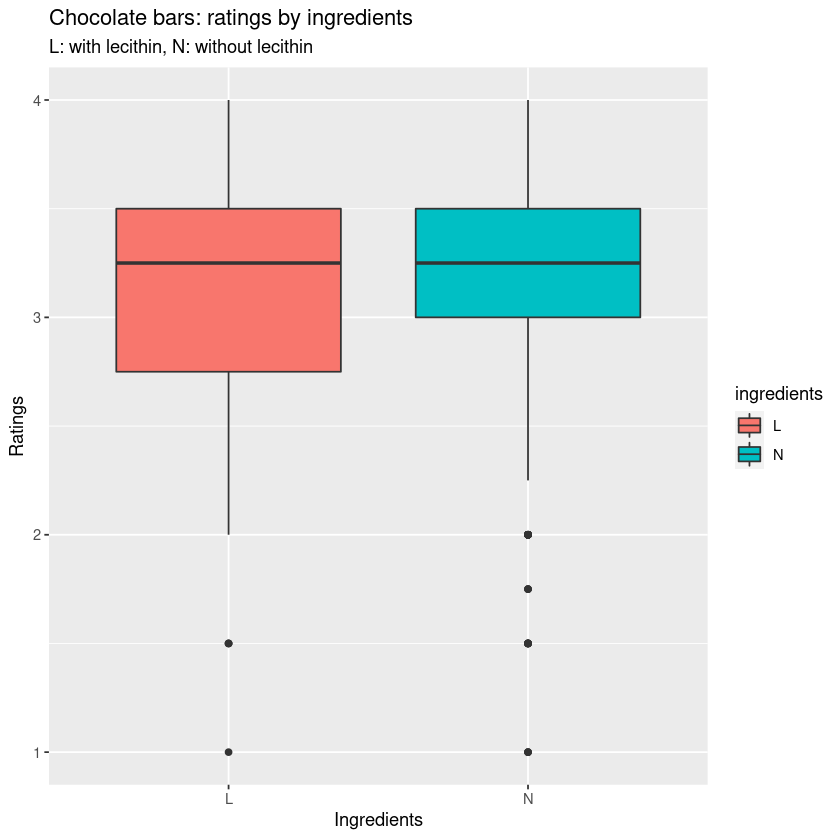

In [55]:
ggplot(df, aes(y = rating, x = ingredients, fill = ingredients)) +
geom_boxplot() + labs(title = "Chocolate bars: ratings by ingredients", subtitle = "L: with lecithin, N: without lecithin", x = "Ingredients", y = "Ratings")

## Is the ingredient an indicator of quality?

We aim to examine the following hypothesis:

$H_0: \mu_{diff} = 0$: the average rating for both ingredients is the same. \
$H_A: \mu_{diff} > 0$: the average rating of chocolate bars with lecithin is lower than those without lecithin.

With the arguments developed in the section "Is the cacao bean's origin an indicator of quality? ", we opted for the Mann-Whitney test, a non-parametric hypothesis test. We found a significant difference in the ratings of chocolate bars depending on their ingredients: chocolate bars with lecithin receive lower ratings than those without lecithin. Therefore, the absence of lecithin as an ingredient is indicative of product quality.


In [56]:
wilcox.test(rating~ingredients, df, alternative = "less")


	Wilcoxon rank sum test with continuity correction

data:  rating by ingredients
W = 471142, p-value = 0.01532
alternative hypothesis: true location shift is less than 0


# Conclusion

We analyzed the ratings of chocolate bars from around the world considering the following variables:

1. The origin of cocoa beans (country)
2. Cocoa content 
3. Ingredient

As for the first independent variable (the origin of cocoa beans), it had no influence on ratings: there was no statistically significant difference across countries (Kruskal-Wallis, $\chi^2$ = 74.901, df = 61, p = 0.1087).

High cocoa percentages in chocolate bars (71% or above) have a negative impact on ratings, but the correlation is quite weak (Spearman, $\rho$ = 0.11, p = 3.02e-8).

The ingredient is the strongest indicator of quality: chocolate bars with lecithin have lower ratings than chocolate bars without this ingredient (Mann-Whitney, W = 471142, p = 0.01532).